<h2>Intoduction</h2>
<br>
This notebook is analyzing accuracies on test data of traines models. We would like to analyze accuracy, test hypothesis, whether all networks have same results and if we have only one best network. We will be using anova and confidence itnervals.

### Load and data preprocessing section

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from PIL import Image
import itertools
import tqdm
import cv2
import seaborn as sns
import matplotlib.colors as mcolors
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as st

#### Get list of files

In [2]:
predictions_folder_path = pathlib.Path(r".\inputs\Training_records")
list_of_files = {
    "deeplabv3":pathlib.Path(predictions_folder_path / r"deeplabv3\metrics.csv"),
    "segnetwithresnet50":pathlib.Path(predictions_folder_path / r"resnet50_segnet\metrics.csv"),
    "unetwithresnet50":pathlib.Path(predictions_folder_path / r"resnet50_unet\metrics.csv"),
    "unetsmall":pathlib.Path(predictions_folder_path / r"unet_small\metrics.csv"),
    "unet_predefined":pathlib.Path(predictions_folder_path / r"unet2\metrics.csv"),
    "segnetwithvgg":pathlib.Path(predictions_folder_path / r"vgg_segnet\metrics.csv"),
    "unetwithvgg":pathlib.Path(predictions_folder_path / r"vgg_unet\metrics.csv"),
}

#### Read all stats file to get IoU and accuracy

In [4]:
pd_complete_df = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr', 'epoch'])
for network_name, file_path in list_of_files.items():
    df_tmp = pd.read_csv(file_path)
    df_tmp["network"] = network_name
    df_tmp.rename(columns={'Unnamed: 0':'epoch'}, inplace=True)
    pd_complete_df = pd.concat([pd_complete_df, df_tmp], axis = 0)
pd_complete_df

,loss,accuracy,val_loss,val_accuracy,lr,epoch,network
0,0.864164,0.642235,0.554218,0.774230,0.001000,0,deeplabv3
1,0.797217,0.673595,0.536456,0.785292,0.001000,1,deeplabv3
2,0.711000,0.711254,0.592193,0.778234,0.001000,2,deeplabv3
3,0.652915,0.735469,0.555293,0.780726,0.001000,3,deeplabv3
4,0.612488,0.751404,0.535817,0.791010,0.001000,4,deeplabv3
...,...,...,...,...,...,...,...
59,0.462656,0.814865,0.499372,0.789445,0.000002,59,unetwithvgg
60,0.459784,0.816064,0.501406,0.788756,0.000002,60,unetwithvgg
61,0.458543,0.816522,0.502188,0.788507,0.000002,61,unetwithvgg
62,0.457771,0.816790,0.502367,0.788462,0.000002,62,unetwithvgg


### Visualize results

<h3>Visualization of training</h3>
Here, we are about to visualize evolution of networks accuracies and losses during training. 

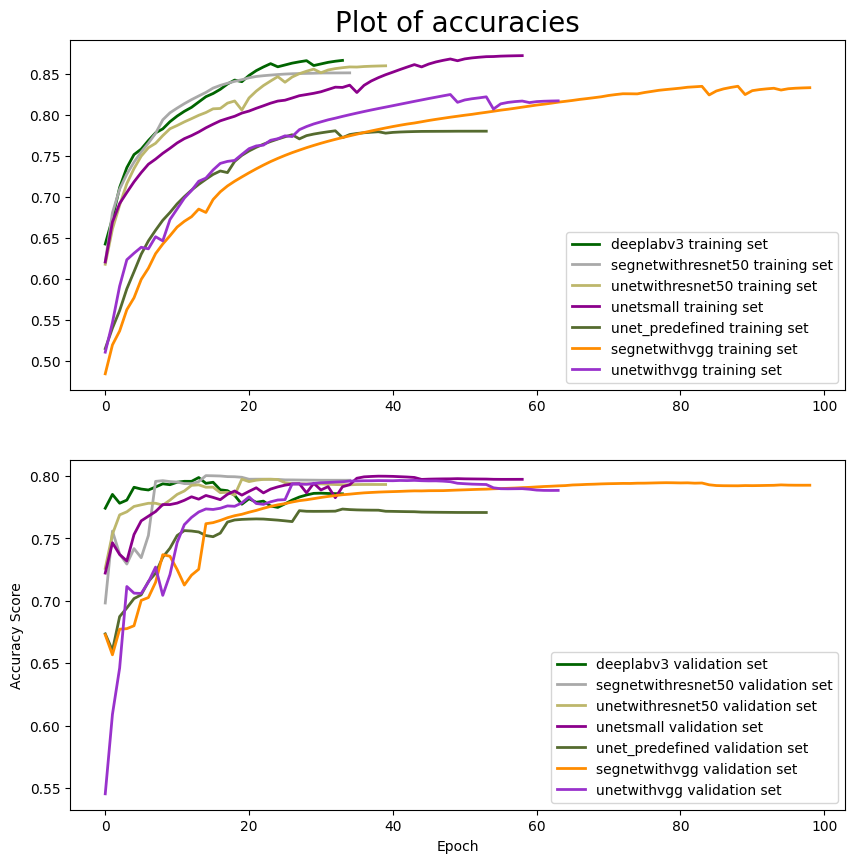

In [90]:
list_of_colors = list(mcolors.CSS4_COLORS.keys())

fig = plt.figure(figsize= (10, 10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.set_title("Plot of accuracies", fontsize= 20)

data = []
for network_id, network_name in enumerate(pd_complete_df["network"].unique()):
    tmp_df = pd_complete_df[pd_complete_df["network"]==network_name]
    ax1.plot(tmp_df["epoch"], tmp_df["accuracy"], color=list_of_colors[network_id+25],
     linewidth=2, markersize=12, label = network_name+" training set")
    ax2.plot(tmp_df["epoch"], tmp_df["val_accuracy"], color=list_of_colors[network_id+25],
     linewidth=2, markersize=12, label = network_name+" validation set")
ax1.legend()
ax2.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

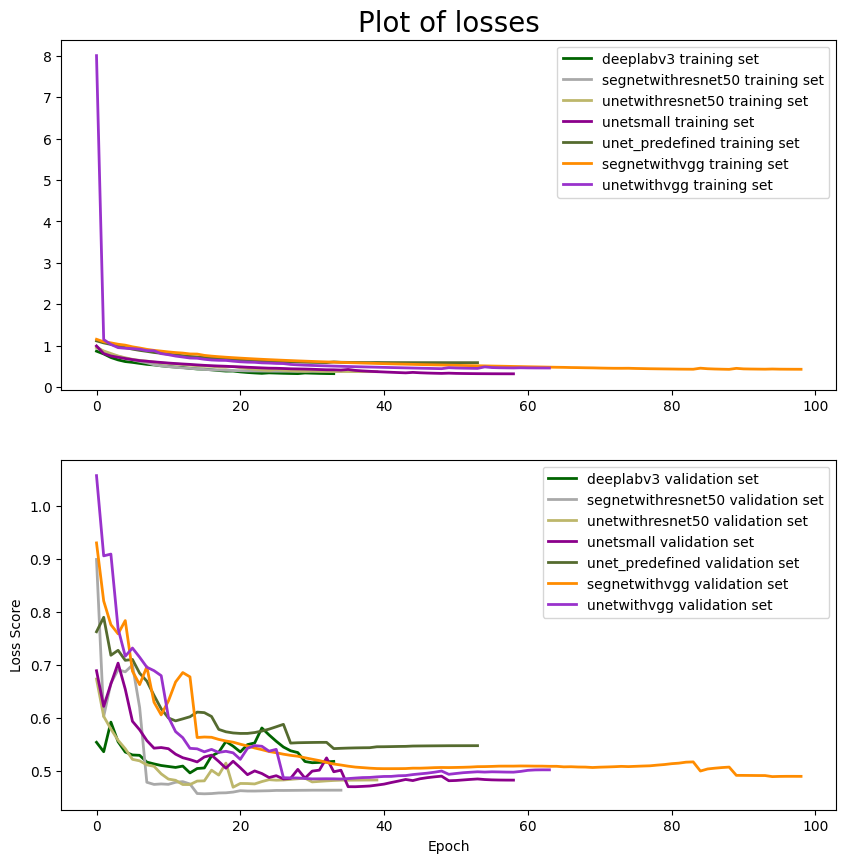

In [92]:
fig = plt.figure(figsize= (10, 10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.set_title("Plot of losses", fontsize= 20)

data = []
for network_id, network_name in enumerate(pd_complete_df["network"].unique()):
    tmp_df = pd_complete_df[pd_complete_df["network"]==network_name]
    ax1.plot(tmp_df["epoch"], tmp_df["loss"], color=list_of_colors[network_id+25],
     linewidth=2, markersize=12, label = network_name+" training set")
    ax2.plot(tmp_df["epoch"], tmp_df["val_loss"], color=list_of_colors[network_id+25],
     linewidth=2, markersize=12, label = network_name+" validation set")
ax1.legend()
ax2.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss Score")
plt.show()

We can see, that some networks are able to reach their training maximum very quickly till 20th epoch. Some networks need to be trained longer. Anyway we can see that networks using resnet for downsampling are able to quickly adapt and reach their maximum potential. 

<h3>Visualization of maximum accuracy</h3>
Here, we are able to see maximal accuracy of networks reached using validation set

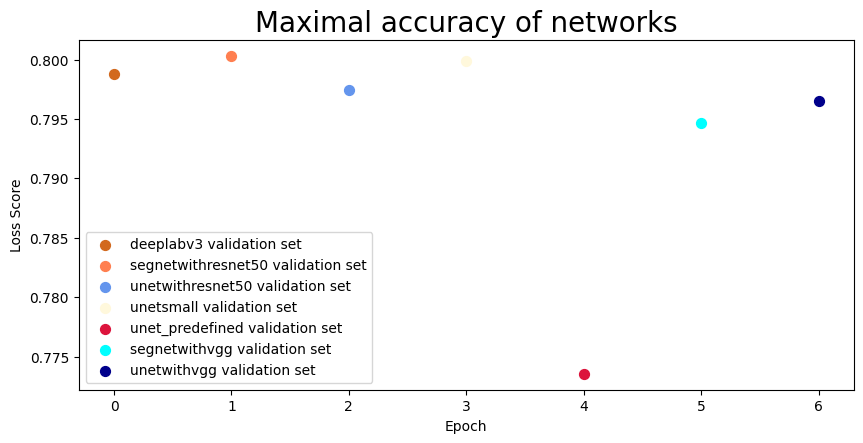

In [103]:
fig = plt.figure(figsize= (10, 10))
ax1 = plt.subplot(211)

ax1.set_title("Maximal accuracy of networks", fontsize= 20)
data = []
for network_id, network_name in enumerate(pd_complete_df["network"].unique()):
    tmp_df = pd_complete_df[pd_complete_df["network"]==network_name]
    ax1.scatter(network_id, tmp_df["val_accuracy"].max(), color=list_of_colors[network_id+15],
     s=50, label = network_name+" validation set")
ax1.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss Score")
plt.show()

<h2>Conclusion</h2>
We can conclude following:
<ul>
  <li>All networks that use the implementation of downsampling with a pre-trained model achieve the high results. </li>
  <li>Unet in its full version achieves worse results than its counterpart with fewer filters and layers. A possible reason is that the dataset was not sufficient to train this network. </li>
</ul>

